In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (10).zip to archive (10) (1).zip


In [ ]:
import zipfile
import os


zip_path = "/content/archive (10).zip"
extract_path = "/content/e_waste_dataset"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


✅ Dataset extracted to: /content/e_waste_dataset


In [ ]:
!ls /content/e_waste_dataset


modified-dataset


In [ ]:
!ls /content/e_waste_dataset/modified-dataset

modified-dataset  test	train  val


STEP 1: Import Required Libraries

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

 STEP 2: Extract the Dataset

In [ ]:
zip_path = "/content/archive (10).zip"   # your uploaded zip file
extract_path = "/content/e_waste_dataset/modified-dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


 STEP 3: Check Folder Structure



In [ ]:
base_dir = extract_path
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

print("✅ Train Path:", train_dir)
print("✅ Validation Path:", val_dir)
print("✅ Test Path:", test_dir)

✅ Train Path: /content/e_waste_dataset/modified-dataset/train
✅ Validation Path: /content/e_waste_dataset/modified-dataset/val
✅ Test Path: /content/e_waste_dataset/modified-dataset/test


STEP 4: Data Preprocessing & Augmentation

In [ ]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


STEP 5: Build the Improved CNN Model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,750,538 (10.49 MB)

 Trainable params: 2,750,538 (10.49 MB)

 Non-trainable params: 0 (0.00 B)

STEP 6: Train the Model (Reduced Epochs)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,   # 👈 Reduced to 10 epochs
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.1524 - loss: 2.2570 - val_accuracy: 0.2867 - val_loss: 2.0218
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.2908 - loss: 1.9703 - val_accuracy: 0.3500 - val_loss: 1.8708
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3009 - loss: 1.9074 - val_accuracy: 0.4533 - val_loss: 1.6141
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.3510 - loss: 1.8091 - val_accuracy: 0.4833 - val_loss: 1.5452
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3446 - loss: 1.7831 - val_accuracy: 0.4900 - val_loss: 1.5156
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.3823 - loss: 1.6978 - val_accuracy: 0.5500 - val_loss: 1.3441
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.4455 - loss: 1.5891 - val_accuracy: 0.5200 - val_loss: 1.4138
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.4253 - loss: 1.5840 - val_accuracy: 0.5767 - v

STEP 7: Visualize Training Results

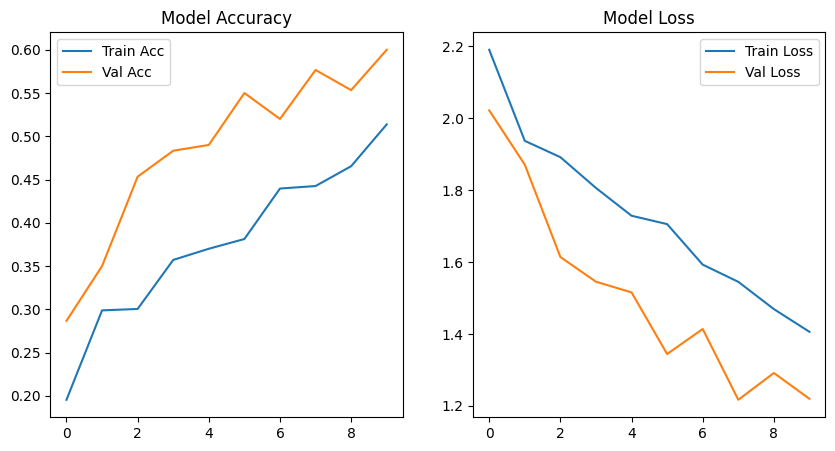

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.legend()
plt.show()

 STEP 8: Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"✅ Final Test Accuracy: {test_acc*100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.5346 - loss: 1.2719
✅ Final Test Accuracy: 52.33%


STEP 9: Save the Model

In [ ]:
model.save('ewaste_cnn_model_improved_10epochs.keras')
print("✅ Model saved successfully as ewaste_cnn_model_improved_10epochs.keras")


✅ Model saved successfully as ewaste_cnn_model_improved_10epochs.keras
